In [1]:
import numpy as N
import numpy.random as NR
import pandas
import tqdm
import matplotlib.pyplot as pyplot
import seaborn

seaborn.set_style('whitegrid')

import tqdm
import torch as T
import torch.distributions as TD
import torch.distributions.constraints as TDC
import torch.nn as TN
import torch.nn.functional as TNF
import pyro as P
import pyro.infer as PI
import pyro.optim as PO
import pyro.distributions as PD
import pyro.nn as PN

P.set_rng_seed(0)

In [2]:
import sys
sys.path.append('..')
sys.path.append('../..')
import igg
import model
import guide

In [3]:
def draw():
    return float(NR.normal(4, 1.0, (1,)).astype('float32'))

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:07<00:00, 326.30it/s]


<AxesSubplot:xlabel='step', ylabel='loss'>

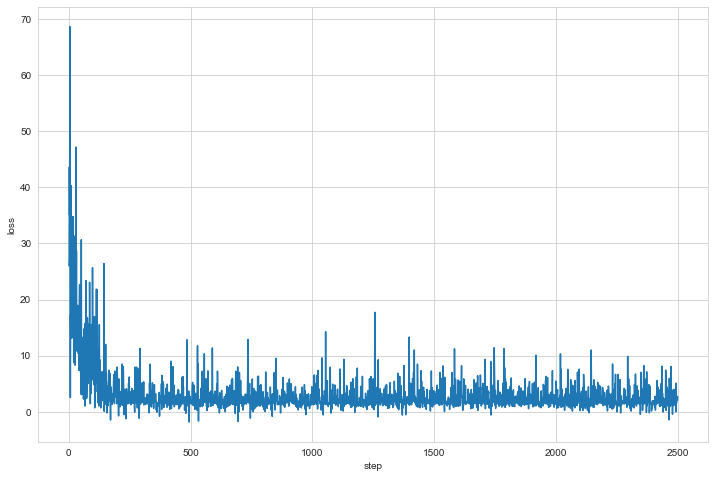

In [4]:
P.clear_param_store()
svi = PI.SVI(model=model.model,
            guide=guide.model,
            optim=PO.SGD({"lr": 0.001, "momentum": 0.1}),
             loss=PI.Trace_ELBO()
            )
hist = pandas.DataFrame(columns=["step", "loss"])
for step in tqdm.trange(2500):
    obs = draw()
    loss = svi.step(obs)
    hist = hist.append({
        "step": step,
        "loss": loss,
    }, ignore_index=True)

fig, ax = pyplot.subplots(figsize=(12,8))
seaborn.lineplot(x="step", y="loss", data=hist, ax=ax)